In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
from underthesea import word_tokenize, pos_tag, sent_tokenize
import demoji
import regex as re
from pyvi import ViPosTagger, ViTokenizer
import nlp_vnmese_libs1 as func
import string

In [4]:
import os
import sys; 
path=os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
sys.path.insert(0,path)
import import_ipynb
from Lib.Lib_Evaluation_Classification_Model import *

importing Jupyter notebook from D:\Baitap\Đồ án tốt nghiệp\Lib\Lib_Evaluation_Classification_Model.ipynb


In [5]:
data = pd.read_csv('Foody.csv',index_col=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39925 entries, 0 to 39924
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurant    39925 non-null  object 
 1   review_text   39925 non-null  object 
 2   review_score  39925 non-null  float64
 3   sentiment     39925 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [7]:
data

,restaurant,review_text,review_score,sentiment
0,Good Morning Restaurant,Pizza phong cách Ý. Ngán hải sản nên cả nhà gh...,8.2,positive
1,Hạt Dẻ Trùng Khánh,- Vị trí: chỉ là 1 chiếc xe nho nhỏ nằm ở khu ...,8.0,positive
2,Bột - Healthy & Weight Loss Food - Shop Online,Nay lang thang trên BM thấy đang khuyến mãi xo...,8.2,positive
3,Bánh Giò Chợ Nguyễn Công Trứ,"Quán nằm trong chợ Nguyễn Công Trứ, cũng dễ tì...",8.2,positive
4,Quán Quảng - Bún Quảng,Ngãi heo với heo thiệttttt 🐷🐷🐷\n🤤🤤 bún nem chả...,9.0,positive
...,...,...,...,...
39920,Bánh Bao Nóng Chi Béo - Hàng Bông,Tình cờ đọc được một bài viết review của một b...,8.2,positive
39921,Bò Tơ Quán Mộc - Nguyễn Thị Định,Gọi hai đĩa nướng và xông hơi. Mỗi đĩa 200/k n...,7.4,positive
39922,Sumo BBQ - SC VivoCity - Buffet Nướng & Lẩu,"Quán không gian đẹp, thoáng mát. Nhân viên nhi...",10.0,positive
39923,Xôi Lá Việt - Trưng Nữ Vương,"Quá ngon, đặt nhiều lần rồi chừ mới lên review...",10.0,positive


In [8]:
data = data.drop_duplicates()

In [9]:
data['review_text_token'] = data.review_text.apply(lambda x:func.clean_text_thesea(str(x), func.emoji_dict, func.teen_dict, func.wrong_lst, func.stopwords_lst))

In [10]:
data

,restaurant,review_text,review_score,sentiment,review_text_token
0,Good Morning Restaurant,Pizza phong cách Ý. Ngán hải sản nên cả nhà gh...,8.2,positive,ngán ghé rẻ trình_bày đẹp
1,Hạt Dẻ Trùng Khánh,- Vị trí: chỉ là 1 chiếc xe nho nhỏ nằm ở khu ...,8.0,positive,hòa đông đối_diện thích sạch_sẽ chuyên_nghiệp ...
2,Bột - Healthy & Weight Loss Food - Shop Online,Nay lang thang trên BM thấy đang khuyến mãi xo...,8.2,positive,thắng khuyến_mãi đọc đặt_hàng thử cảm_nhận đặt...
3,Bánh Giò Chợ Nguyễn Công Trứ,"Quán nằm trong chợ Nguyễn Công Trứ, cũng dễ tì...",8.2,positive,nguyễn trứ thẳng đông đá lộn ngải_cứu siêu kèm...
4,Quán Quảng - Bún Quảng,Ngãi heo với heo thiệttttt 🐷🐷🐷\n🤤🤤 bún nem chả...,9.0,positive,ngãi khéo kế ốc vừa_miệng nướng mềm không_thíc...
...,...,...,...,...,...
39920,Bánh Bao Nóng Chi Béo - Hàng Bông,Tình cờ đọc được một bài viết review của một b...,8.2,positive,tình_cờ đọc viết quyết_tâm thử làm_ăn vừa_miện...
39921,Bò Tơ Quán Mộc - Nguyễn Thị Định,Gọi hai đĩa nướng và xông hơi. Mỗi đĩa 200/k n...,7.4,positive,nướng xông_hơi không_cho kèm không xông_hơi đò...
39922,Sumo BBQ - SC VivoCity - Buffet Nướng & Lẩu,"Quán không gian đẹp, thoáng mát. Nhân viên nhi...",10.0,positive,không_đẹp mát đáo xuất chóng đẹp_mắt cười cười
39923,Xôi Lá Việt - Trưng Nữ Vương,"Quá ngon, đặt nhiều lần rồi chừ mới lên review...",10.0,positive,chừ đầy_đặn


In [9]:
data.isnull().sum()

restaurant           0
review_text          0
review_score         0
sentiment            0
review_text_token    0
dtype: int64

# WordCloud

In [34]:
from wordcloud import WordCloud

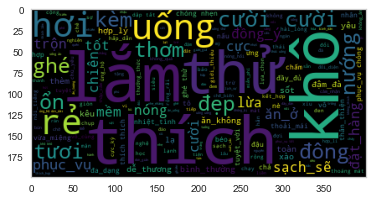

In [46]:
wc = WordCloud().generate(' '.join(data[data['sentiment']=='positive']['review_text_token']))
plt.imshow(wc)

Nhận xét: Các từ xuất hiện nhiều trong Class positive là rẻ, thích, thơm, sạch sẽ

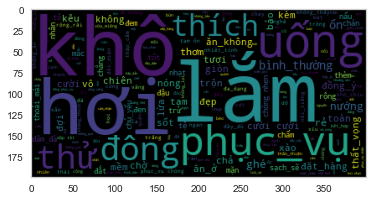

In [45]:
wc = WordCloud().generate(' '.join(data[data['sentiment']=='neutral']['review_text_token']))
plt.imshow(wc)

Nhận xét: Các từ xuất hiện nhiều trong Class neutral là thích, ổn, bình thường

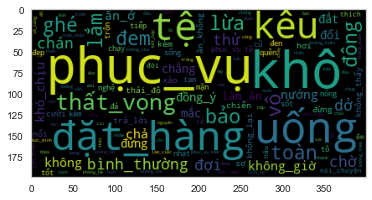

In [47]:
wc = WordCloud().generate(' '.join(data[data['sentiment']=='negative']['review_text_token']))
plt.imshow(wc)

Nhận xét: Các từ xuất hiện nhiều trong Class negative là thất vọng, tệ, chán

In [11]:
text=data['review_text_token']
text = np.array(text)
text

array(['ngán ghé rẻ trình_bày đẹp',
       'hòa đông đối_diện thích sạch_sẽ chuyên_nghiệp hẳn chuyên_nghiệp lắm hạt bự hư thơm_nức lành thử',
       'thắng khuyến_mãi đọc đặt_hàng thử cảm_nhận đặt_hàng khô đồng_ý thử',
       ..., 'không_đẹp mát đáo xuất chóng đẹp_mắt cười cười',
       'chừ đầy_đặn',
       'bạch ghé vô uống chờ rước lý_tưởng mát_mẻ yên_bình phục_vụ tệ phục_vụ đợi uống kêu toán uống bình_thường tạm mắc hơi thất_vọng'],
      dtype=object)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
cv = CountVectorizer(max_features=1000)
cv.fit(text)
vectorizer=cv.transform(text)

In [14]:
X = vectorizer.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X.shape

(39925, 1000)

In [16]:
target = data['sentiment']

In [17]:
target = target.replace("negative", 0)
target = target.replace("neutral", 1)
target = target.replace("positive", 2)

In [18]:
y = np.array(target)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20) 

In [31]:
from lazypredict.Supervised import LazyClassifier

In [32]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric= None)
models, prediction = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:14:24<00:00, 153.94s/it]


In [33]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.73,0.65,None,0.75,1.39
BernoulliNB,0.77,0.64,None,0.77,1.56
LogisticRegression,0.79,0.58,None,0.76,6.26
SGDClassifier,0.79,0.57,None,0.76,35.65
LGBMClassifier,0.80,0.56,None,0.76,12.50
LinearSVC,0.78,0.56,None,0.75,185.34
Perceptron,0.75,0.56,None,0.74,2.30
PassiveAggressiveClassifier,0.71,0.55,None,0.71,3.12
ExtraTreesClassifier,0.78,0.54,None,0.74,116.38


Nhận xét:
* 3 thuật toán phù hợp nhất cho dữ liệu là NearestCentroid, BernoulliNB

## Tunning Parameters for BernoulliNB

In [21]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

In [22]:
clfNB = BernoulliNB()

In [23]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],}

NB_tune = GridSearchCV(estimator=clfNB, param_grid=params, n_jobs=-1, cv=5, verbose=5)
NB_tune.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    7.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   10.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.8s finished


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [57]:
print('Best Accuracy score:',NB_tune.best_score_)
print('Best parameter',NB_tune.best_params_)

Best Accuracy score: 0.7763619286161554
Best parameter {'alpha': 10.0}


## Tunning Parameters for NearestCentroid

In [48]:
from sklearn.neighbors import NearestCentroid

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import arange

In [53]:
model = NearestCentroid()

In [54]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['shrink_threshold'] = arange(0, 1.01, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [55]:
search.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=NearestCentroid(), n_jobs=-1,
             param_grid={'shrink_threshold': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])},
             scoring='accuracy')

In [58]:
print('Best Accuracy score:',search.best_score_)
print('Best parameter',search.best_params_)

Best Accuracy score: 0.510947610102275
Best parameter {'shrink_threshold': 0.0}


Nhận xét: Accuracy score của thuật toán Nearest Centroid thấp hơn BernoulliNB nhiều => Chọn thuật toán BernoulliNB

## Xây dụng model BernoulliNB

In [25]:
NBmodel = BernoulliNB(alpha=1.0)

In [26]:
NBmodel.fit(X_train,y_train)

BernoulliNB()

## Đánh giá mô hình 

In [27]:
score, recall, prec, f1= Static_score_model_class(y_test,NBmodel.predict(X_test),aver='micro')
print('Accuracy Score:',score, '\nRecall:', recall, '\nPrecision:',prec,'\nf1-score:', f1)

Accuracy Score: 0.7748278021289918 
Recall: 0.7748278021289918 
Precision: 0.7748278021289918 
f1-score: 0.7748278021289919


Nhận xét:
* Model cho kết quả tốt (xấp xỉ 80%)

In [28]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'negative', 
                                        1: 'neutral', 
                                        2: 'positive'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

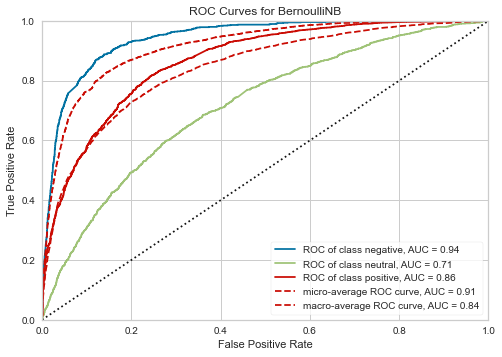

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for BernoulliNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None, encoder={0: 'negative', 1: 'neutral', 2: 'positive'},
       estimator=BernoulliNB())

In [29]:
plot_ROC_curve(NBmodel, X_train, y_train, X_test, y_test)

Nhận xét: 
* Class negative (dislike) được phân loại chính xác nhiều nhất
* Class neutral được phân loại kém nhất => Neutral là phần nằm giữa của negative và positive nên khó phân biệt hơn 2 class kia là chấp nhận dc